# Exploratoty Data Analysis for Physical Inactivity

## Overview
In this file two datasets are used i.e Physical Inactivity and Mortality data
### Key section:
1. Datasets 
2. SQL connection and inserting Data IN SQL 
3. Exploratory data analysis for Physical Inactivity dataset specifically for Canada
5. Joining Physical Inactivity Data with mortality: to see if physical inactivity has any impact on one of the diseases
6. Visualization

Physical Inactivity Dataset:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-insufficient-physical-activity-among-adults-aged-18-years-(age-standardized-estimate)-(-)</br>
Mortality Dataset:</br>
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-attributed-to-non-communicable-diseases-by-type-of-disease-and-sex</br>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sq

In [9]:
physical_inactivity_df=pd.read_csv("Global_Physical Inactivity.csv")
physical_inactivity_df.head()

,Indicator,ParentLocation,Location,Period,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,Prevalence of insufficient physical activity a...,Africa,Rwanda,2022,Female,10.07,5.16,17.09,10.1 [5.2-17.1]
1,Prevalence of insufficient physical activity a...,South-East Asia,Nepal,2022,Male,10.45,5.15,17.74,10.4 [5.1-17.7]
2,Prevalence of insufficient physical activity a...,Africa,Comoros,2022,Male,10.54,3.13,24.20,10.5 [3.1-24.2]
3,Prevalence of insufficient physical activity a...,Europe,Netherlands (Kingdom of the),2022,Female,10.71,6.66,15.73,10.7 [6.7-15.7]
4,Prevalence of insufficient physical activity a...,Europe,Turkmenistan,2022,Male,10.82,4.53,19.54,10.8 [4.5-19.5]


In [10]:
mortality_df = pd.read_csv("Global_Mortality.csv")
mortality_df.head()

,ParentLocation,Location,Period,Dim1,Dim2,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,South-East Asia,Timor-Leste,2019,Male,Diabetes mellitus,99.53,49.54,167.8,100 [50-168]
1,South-East Asia,Bhutan,2019,Female,Diabetes mellitus,100.20,56.06,163.0,100 [56-163]
2,Europe,Montenegro,2019,Both sexes,Respiratory diseases,100.00,63.92,145.0,100 [64-145]
3,Africa,Seychelles,2019,Male,Malignant neoplasms,99.63,66.17,144.1,100 [66-144]
4,Africa,Lesotho,2019,Male,Diabetes mellitus,1003.00,580.00,1612.0,1003 [580-1612]


## Renaming Columns

In [11]:
physical_inactivity_df.rename(columns={"ParentLocation":"Region", 
                                       "Location":"Country","FactValueNumeric":"Physical_Inactivity_Value",
                                       "FactValueNumericLow":"Physical_Inactivity_Value_Low",
                                       "FactValueNumericHigh":"Physical_Inactivity_Value_High", 
                                       "Dim1":"Gender",
                                       "Period": "Year",
                                       "Value":"Range"},inplace=True)

physical_inactivity_df.head()

,Indicator,Region,Country,Year,Gender,Physical_Inactivity_Value,Physical_Inactivity_Value_Low,Physical_Inactivity_Value_High,Range
0,Prevalence of insufficient physical activity a...,Africa,Rwanda,2022,Female,10.07,5.16,17.09,10.1 [5.2-17.1]
1,Prevalence of insufficient physical activity a...,South-East Asia,Nepal,2022,Male,10.45,5.15,17.74,10.4 [5.1-17.7]
2,Prevalence of insufficient physical activity a...,Africa,Comoros,2022,Male,10.54,3.13,24.20,10.5 [3.1-24.2]
3,Prevalence of insufficient physical activity a...,Europe,Netherlands (Kingdom of the),2022,Female,10.71,6.66,15.73,10.7 [6.7-15.7]
4,Prevalence of insufficient physical activity a...,Europe,Turkmenistan,2022,Male,10.82,4.53,19.54,10.8 [4.5-19.5]


In [12]:
mortality_df.rename(columns={"FactValueNumeric":"Mortality_Value",
                             "FactValueNumericLow":"Mortality_Value_Low",
                             "FactValueNumericHigh":"Mortality_Value_High", 
                             "Dim1":"Gender",
                             "Dim2":"Disease",
                             "Period": "Year"},inplace=True)
mortality_df.head()

,ParentLocation,Location,Year,Gender,Disease,Mortality_Value,Mortality_Value_Low,Mortality_Value_High,Value
0,South-East Asia,Timor-Leste,2019,Male,Diabetes mellitus,99.53,49.54,167.8,100 [50-168]
1,South-East Asia,Bhutan,2019,Female,Diabetes mellitus,100.20,56.06,163.0,100 [56-163]
2,Europe,Montenegro,2019,Both sexes,Respiratory diseases,100.00,63.92,145.0,100 [64-145]
3,Africa,Seychelles,2019,Male,Malignant neoplasms,99.63,66.17,144.1,100 [66-144]
4,Africa,Lesotho,2019,Male,Diabetes mellitus,1003.00,580.00,1612.0,1003 [580-1612]


## SQL Connection and Insertion to Server

In [6]:
username = 'root'
password = 'Navya.sri.123'
host = 'localhost'  # or '127.0.0.1' or your server's IP address
port = '3306'       # default MySQL port
database = 'navya'

# Create the connection URL
connection_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

engine = sq.create_engine(connection_url)

In [129]:
physical_inactivity_df.to_sql('physicalinactivity', con=engine, if_exists='append', index=False)

13455

In [130]:
mortality_df.to_sql('mortality', con=engine, if_exists='append', index=False)

43920

## Exploring Data

In [13]:
# Rank of canada among all countries for 2000

query1 = """ WITH RankedPhysical AS ( SELECT country, Physical_Inactivity_Value, RANK() OVER (ORDER BY Physical_Inactivity_Value DESC) AS rank_value
    FROM physicalinactivity WHERE Gender = 'Both sexes' AND Year = 2000) SELECT country, Physical_Inactivity_Value, rank_value
    FROM RankedPhysical WHERE country = 'Canada';"""

ranked_data = pd.read_sql_query(query1, engine)

print("Canada rank for 2000 out of 195 countries")

ranked_data.head()

Canada rank for 2000 out of 195 countries


,country,Physical_Inactivity_Value,rank_value
0,Canada,25.65,88


In [14]:
# Rank of canada among all countries for 2018

query2 = """ WITH RankedPhysical AS ( SELECT Country, Physical_Inactivity_Value, RANK() OVER (ORDER BY Physical_Inactivity_Value DESC) AS rank_value
    FROM physicalinactivity WHERE Gender = 'Both sexes' AND Year = 2018) SELECT Country, Physical_Inactivity_Value, rank_value
    FROM RankedPhysical WHERE Country = 'Canada';"""

ranked_data = pd.read_sql_query(query2, engine)

print("Canada rank for 2018 out of 195 countries:")

ranked_data.head()

Canada rank for 2018 out of 195 countries:


,Country,Physical_Inactivity_Value,rank_value
0,Canada,35.07,45


In [15]:
# Average Physical Inactivity in Canada Rank among all countries from 2000 to 2018

query3 = '''WITH RankedTobacco AS (
    SELECT  
        Country, 
        AVG(Physical_Inactivity_Value) AS avg_physical_value, 
        RANK() OVER (ORDER BY AVG(Physical_Inactivity_Value) DESC) AS rank_value
    FROM physicalinactivity 
    WHERE Gender = 'Both sexes' AND Year >= 2000 AND Year <= 2019
    GROUP BY Country)
SELECT Country, avg_physical_value, rank_value
FROM RankedTobacco
WHERE Country = 'Canada';'''

print("AVG Canada rank for Physical Inactivity out of 195 countries:")

ranked_data = pd.read_sql_query(query3, engine)

ranked_data.head()

AVG Canada rank for Physical Inactivity out of 195 countries:


,Country,avg_physical_value,rank_value
0,Canada,30.74,66


In [34]:
# Over all trend of physical inactivity for males and females in recenty years in Canada
query4 = """SELECT Country,Year,Gender,Physical_Inactivity_Value, Physical_Inactivity_Value_Low, Physical_Inactivity_Value_High 
            FROM physicalinactivity
            where year<=2018 and Country='Canada' and gender!='Both sexes' order by year DESC;
        """   
result=pd.read_sql_query(query4, engine)
result

,Country,Year,Gender,Physical_Inactivity_Value,Physical_Inactivity_Value_Low,Physical_Inactivity_Value_High
0,Canada,2018,Male,33.44,25.78,41.39
1,Canada,2018,Female,36.69,27.98,45.56
2,Canada,2017,Male,32.89,25.59,40.42
3,Canada,2017,Female,36.23,27.90,44.71
4,Canada,2016,Male,32.33,25.22,39.73
5,Canada,2016,Female,35.76,27.81,43.94
6,Canada,2015,Male,31.79,24.95,39.09
7,Canada,2015,Female,35.29,27.52,43.30
8,Canada,2014,Male,31.26,24.48,38.46
9,Canada,2014,Female,34.82,27.18,42.85


## Merging Physical Inactivity and Mortality

In [ ]:
#Cardivascular vs Physical Inactivity
query5 = '''SELECT p.Country, p.Year, p.Gender, m.Disease,p.Physical_Inactivity_Value, m.Mortality_Value FROM physicalinactivity p JOIN mortality m ON 
        p.Year = m.Year AND p.Gender = m.Gender AND p.Country = m.Location WHERE p.Country = 'Canada' AND m.Disease = 'Cardiovascular Diseases'; '''
cardio_physical = pd.read_sql_query(query5, engine)
cardio_physical

,Country,Year,Gender,Disease,Physical_Inactivity_Value,Mortality_Value
0,Canada,2019,Male,Cardiovascular diseases,34.00,36230.0
1,Canada,2019,Both sexes,Cardiovascular diseases,35.58,70202.0
2,Canada,2019,Female,Cardiovascular diseases,37.16,33972.0
3,Canada,2018,Male,Cardiovascular diseases,33.44,36074.0
4,Canada,2018,Both sexes,Cardiovascular diseases,35.07,70147.0
5,Canada,2018,Female,Cardiovascular diseases,36.69,34074.0
6,Canada,2017,Male,Cardiovascular diseases,32.89,36871.0
7,Canada,2017,Both sexes,Cardiovascular diseases,34.56,71372.0
8,Canada,2017,Female,Cardiovascular diseases,36.23,34501.0
9,Canada,2016,Male,Cardiovascular diseases,32.33,35508.0


In [36]:
query6 = '''SELECT p.Country, p.Year, p.Gender, m.Disease,p.Physical_Inactivity_Value, m.Mortality_Value FROM physicalinactivity p JOIN mortality m ON 
        p.Year = m.Year AND p.Gender = m.Gender AND p.Country = m.Location WHERE p.Country = 'Canada' AND m.Disease = 'Diabetes Mellitus';'''

diabetes_physical = pd.read_sql_query(query6, engine)
diabetes_physical

,Country,Year,Gender,Disease,Physical_Inactivity_Value,Mortality_Value
0,Canada,2019,Male,Diabetes mellitus,34.00,3891.0
1,Canada,2019,Both sexes,Diabetes mellitus,35.58,6821.0
2,Canada,2019,Female,Diabetes mellitus,37.16,2930.0
3,Canada,2018,Male,Diabetes mellitus,33.44,3889.0
4,Canada,2018,Both sexes,Diabetes mellitus,35.07,6883.0
5,Canada,2018,Female,Diabetes mellitus,36.69,2994.0
6,Canada,2017,Male,Diabetes mellitus,32.89,3970.0
7,Canada,2017,Both sexes,Diabetes mellitus,34.56,7002.0
8,Canada,2017,Female,Diabetes mellitus,36.23,3032.0
9,Canada,2016,Male,Diabetes mellitus,32.33,3769.0


In [37]:
query7 = '''SELECT p.Country, p.Year, p.Gender, m.Disease,p.Physical_Inactivity_Value, m.Mortality_Value FROM physicalinactivity p JOIN mortality m ON 
        p.Year = m.Year AND p.Gender = m.Gender AND p.Country = m.Location WHERE p.Country = 'Canada' AND m.Disease = 'Malignant neoplasms';'''

cancer_physical = pd.read_sql_query(query7, engine)
cancer_physical

,Country,Year,Gender,Disease,Physical_Inactivity_Value,Mortality_Value
0,Canada,2019,Male,Malignant neoplasms,34.00,42952.0
1,Canada,2019,Both sexes,Malignant neoplasms,35.58,81565.0
2,Canada,2019,Female,Malignant neoplasms,37.16,38614.0
3,Canada,2018,Male,Malignant neoplasms,33.44,42620.0
4,Canada,2018,Both sexes,Malignant neoplasms,35.07,80881.0
5,Canada,2018,Female,Malignant neoplasms,36.69,38261.0
6,Canada,2017,Male,Malignant neoplasms,32.89,42817.0
7,Canada,2017,Both sexes,Malignant neoplasms,34.56,80994.0
8,Canada,2017,Female,Malignant neoplasms,36.23,38177.0
9,Canada,2016,Male,Malignant neoplasms,32.33,42380.0


In [38]:
query8 = '''SELECT p.Country, p.Year, p.Gender, m.Disease,p.Physical_Inactivity_Value, m.Mortality_Value FROM physicalinactivity p JOIN mortality m ON 
        p.Year = m.Year AND p.Gender = m.Gender AND p.Country = m.Location WHERE p.Country = 'Canada' AND m.Disease = 'Respiratory Diseases';'''
resp_physical = pd.read_sql_query(query8, engine)
resp_physical

,Country,Year,Gender,Disease,Physical_Inactivity_Value,Mortality_Value
0,Canada,2019,Male,Respiratory diseases,34.00,10194.0
1,Canada,2019,Both sexes,Respiratory diseases,35.58,19987.0
2,Canada,2019,Female,Respiratory diseases,37.16,9793.0
3,Canada,2018,Male,Respiratory diseases,33.44,10097.0
4,Canada,2018,Both sexes,Respiratory diseases,35.07,19700.0
5,Canada,2018,Female,Respiratory diseases,36.69,9603.0
6,Canada,2017,Male,Respiratory diseases,32.89,10257.0
7,Canada,2017,Both sexes,Respiratory diseases,34.56,19973.0
8,Canada,2017,Female,Respiratory diseases,36.23,9716.0
9,Canada,2016,Male,Respiratory diseases,32.33,9893.0


## Visualization

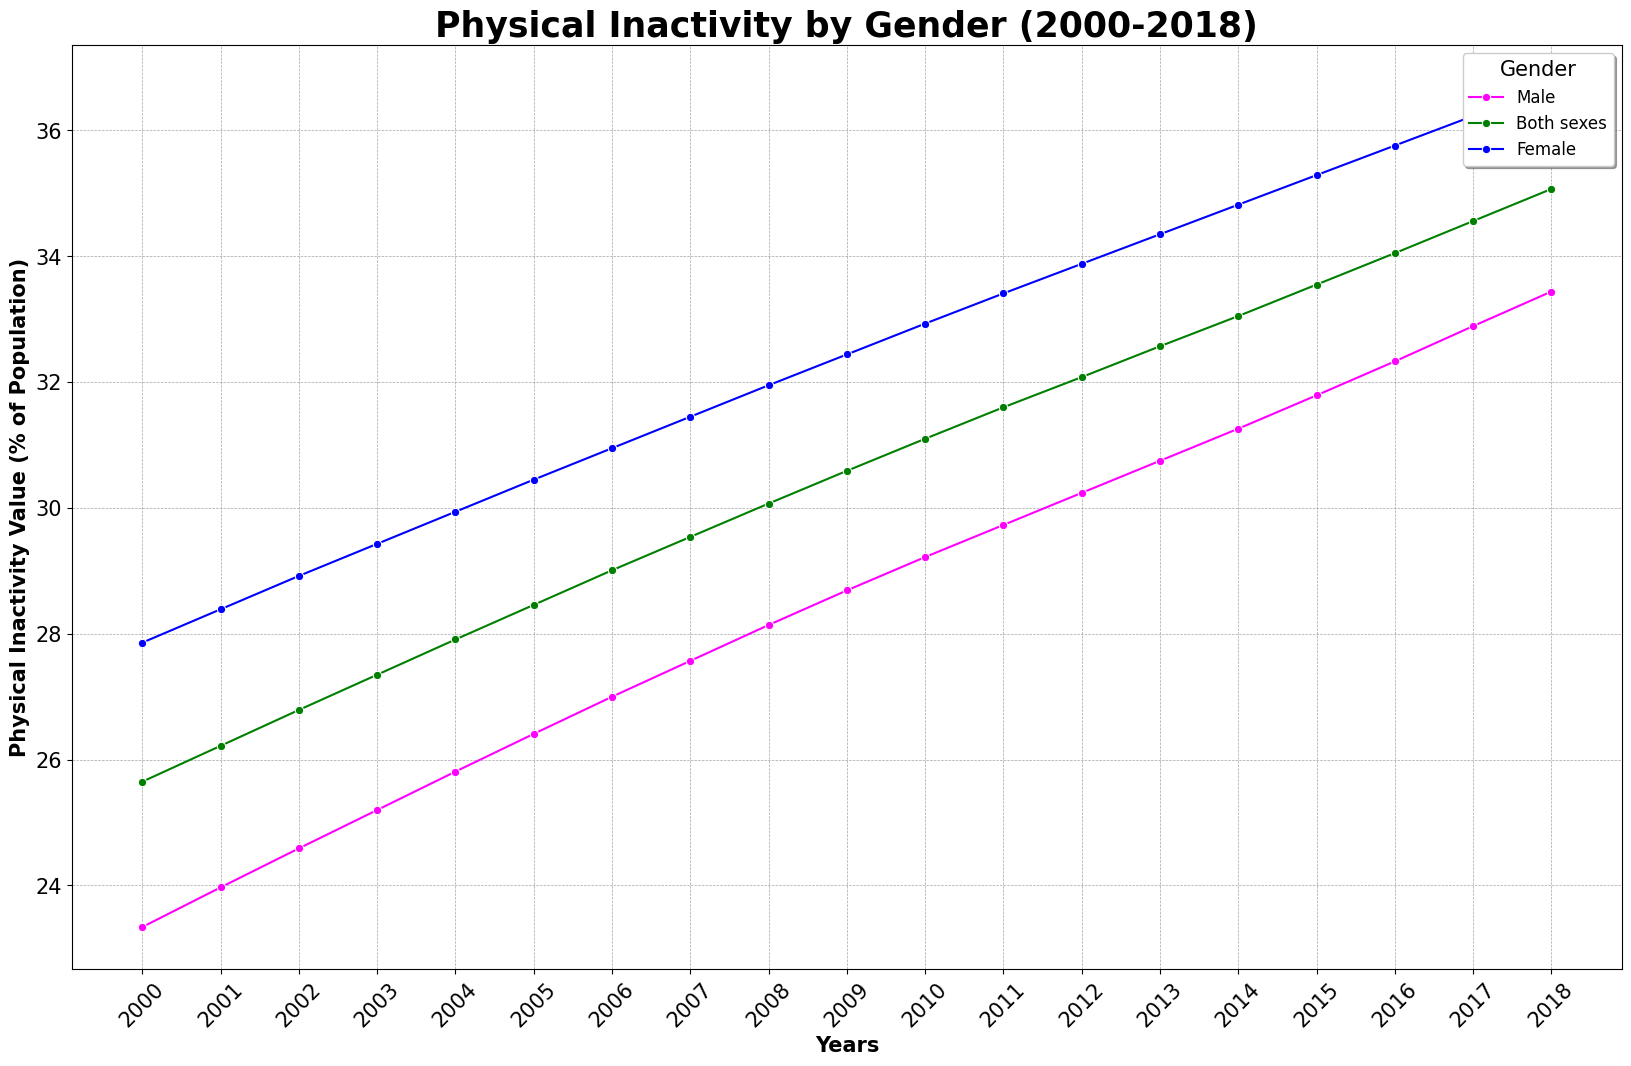

In [ ]:
# Physical Inactivity trend in Canada from 2000 to 2018
query = """SELECT Year, Physical_Inactivity_Value, Gender FROM physicalinactivity where year<=2018 and country='Canada';"""   
canada_physical_inactivity=pd.read_sql_query(query, engine)
canada_physical_inactivity['Year'] = canada_physical_inactivity['Year'].astype(int)

plt.figure(figsize=(20, 12))

sns.lineplot(data=canada_physical_inactivity, x=canada_physical_inactivity['Year'], y=canada_physical_inactivity['Physical_Inactivity_Value'], 
             hue='Gender', marker='o', markersize=6, palette=['Magenta','Green','Blue'])
plt.title("Physical Inactivity by Gender (2000-2018)", fontsize=25, weight='bold')
plt.xlabel("Years", fontsize=15,weight='bold')
plt.ylabel("Physical Inactivity Value (% of Population)", fontsize=15, weight='bold')
plt.legend(frameon=True, shadow=True, loc='upper right',fontsize=12,title="Gender", title_fontsize=15)
years = canada_physical_inactivity['Year'].unique() 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(years, rotation=45)
plt.xticks(ticks=years, labels=years, rotation=45,fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

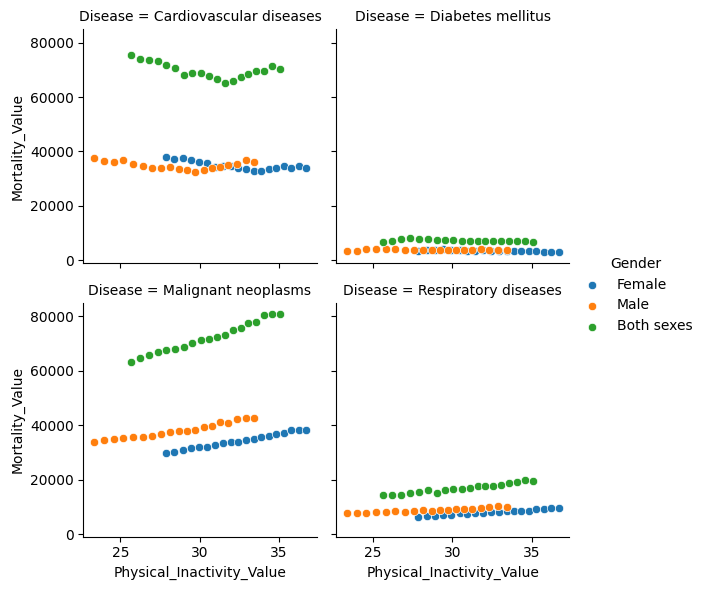

In [33]:
# Correlation between physical inactivity and mortality diseases
query = """SELECT p.Country, p.Year, p.Gender,  p.Physical_Inactivity_Value, m.Mortality_Value, m.Disease FROM physicalinactivity p
    JOIN mortality m ON p.Year = m.Year AND p.Gender = m.Gender and p.Country=m.Location
    WHERE p.Country = 'Canada' AND p.Year BETWEEN 2000 AND 2018 order by m.Disease, m.Year;"""   
result=pd.read_sql_query(query, engine)

pivot_df = result.pivot_table(index='Year', columns='Disease', values='Mortality_Value', aggfunc='first')
pivot_df = pivot_df.reset_index()
result = pd.merge(result, pivot_df, on='Year', how='left')

g = sns.FacetGrid(result, col="Disease", hue="Gender", col_wrap=2)  
g.map_dataframe(sns.scatterplot, x="Physical_Inactivity_Value", y="Mortality_Value")
g.add_legend()
plt.show()